In [4]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Reading the dataset of previous application

df_prevappdata=pd.read_csv("previous_application.csv")
df_appdata=pd.read_csv("application_data.csv")

In [5]:
# Datset Cleansing

# removing the null values columns having more than 30% as null

emptycol1=df_prevappdata.isnull().sum()
emptycol1=emptycol1[emptycol1.values>(0.3*len(emptycol1))]

emptycol1 = list(emptycol1[emptycol1.values>=0.3].index)
df_prevappdata.drop(labels=emptycol1,axis=1,inplace=True)

df_prevappdata.shape

(1670214, 22)

In [6]:
# Removing the column values of 'XNA' and 'XAP'

df_prevappdata=df_prevappdata.drop(df_prevappdata[df_prevappdata['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
df_prevappdata=df_prevappdata.drop(df_prevappdata[df_prevappdata['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
df_prevappdata=df_prevappdata.drop(df_prevappdata[df_prevappdata['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

df_prevappdata.shape

(69635, 22)

In [8]:
# Now merging the Application dataset with previous appliaction dataset

new_df=pd.merge(left=df_appdata,right=df_prevappdata,how='inner',on='SK_ID_CURR',suffixes='_x')

<ipython-input-8-9cf285bef52e>:3: FutureWarning: Passing 'suffixes' as a <class 'str'>, is not supported and may give unexpected results. Provide 'suffixes' as a tuple instead. In the future a 'TypeError' will be raised.
  new_df=pd.merge(left=df_appdata,right=df_prevappdata,how='inner',on='SK_ID_CURR',suffixes='_x')


In [9]:
# Renaming the column names after merging

new_df1 = new_df.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)

In [10]:
# Removing unwanted columns for analysis

new_df1.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION', 
              'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','WEEKDAY_APPR_PROCESS_START_PREV',
              'HOUR_APPR_PROCESS_START_PREV', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

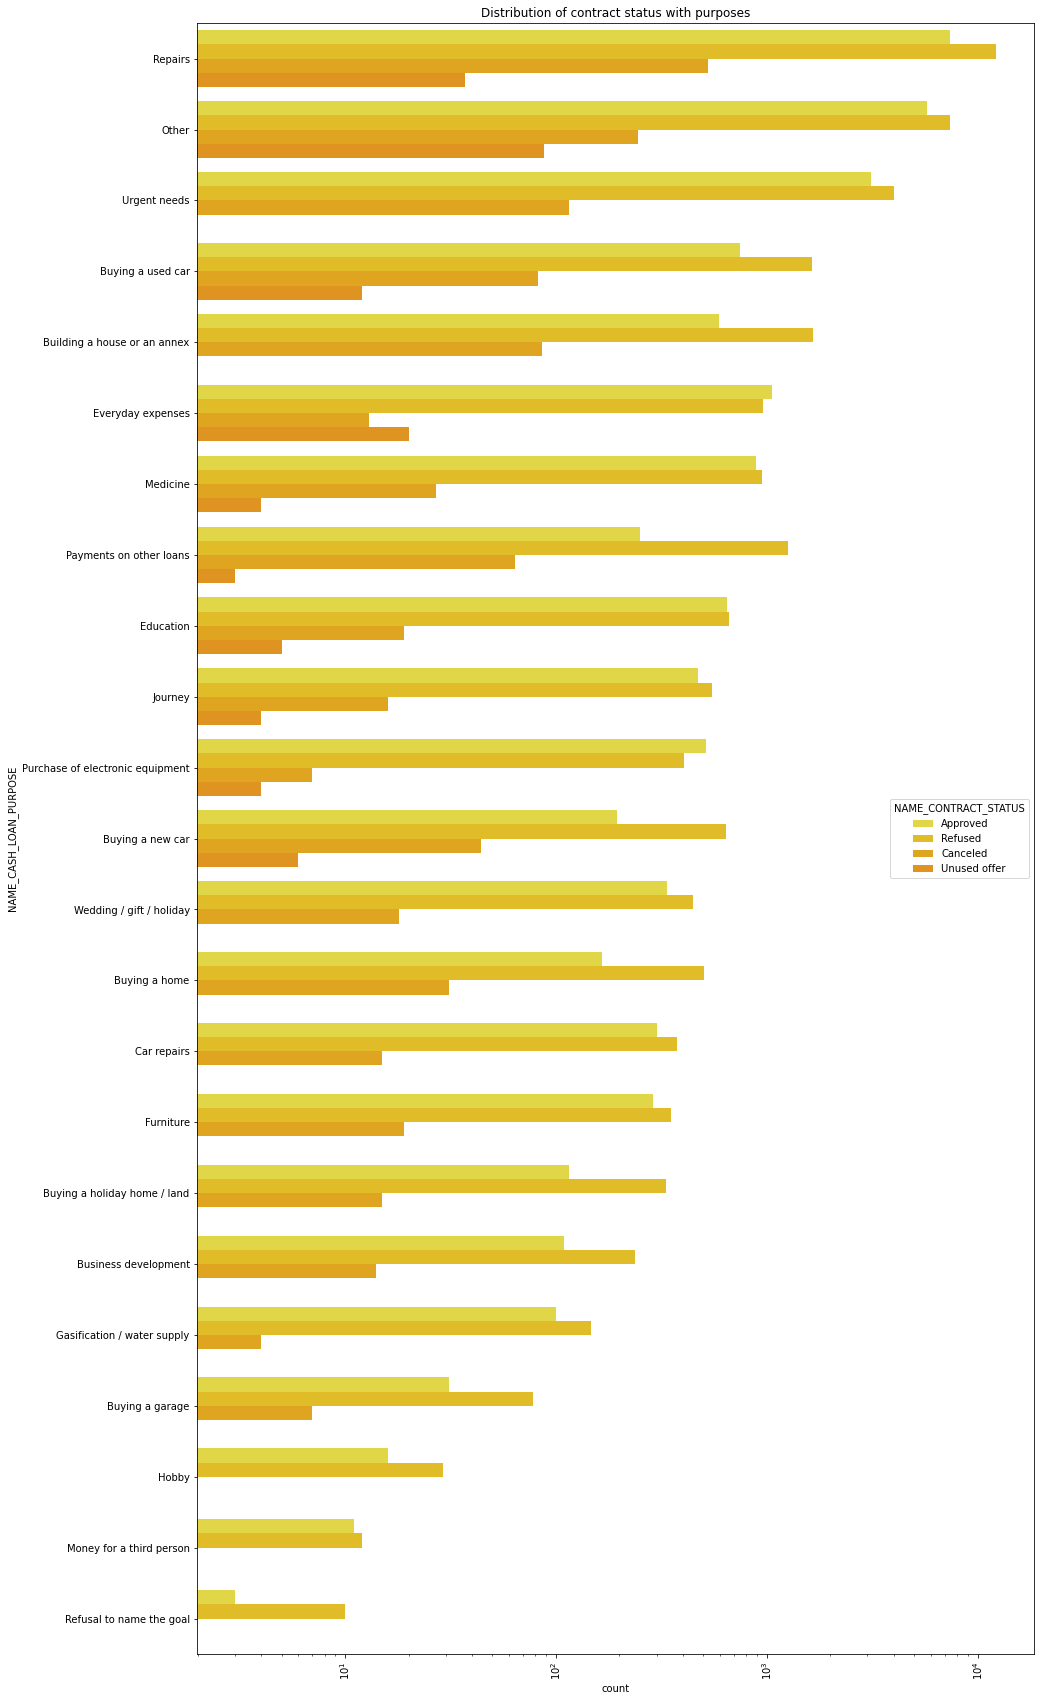

In [20]:
 #Distribution of contract status 

plt.figure(figsize=(15,30))
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status with purposes')
ax = sns.countplot(data = new_df1, y= 'NAME_CASH_LOAN_PURPOSE', order=new_df1['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='Wistia')

Conclusions from above plot:

-repairs had maximum loan rejections and maximum loan approvals.
-min approvals are for 'refusal to name the goal'
-min unused offer is for 'payments to other loans'

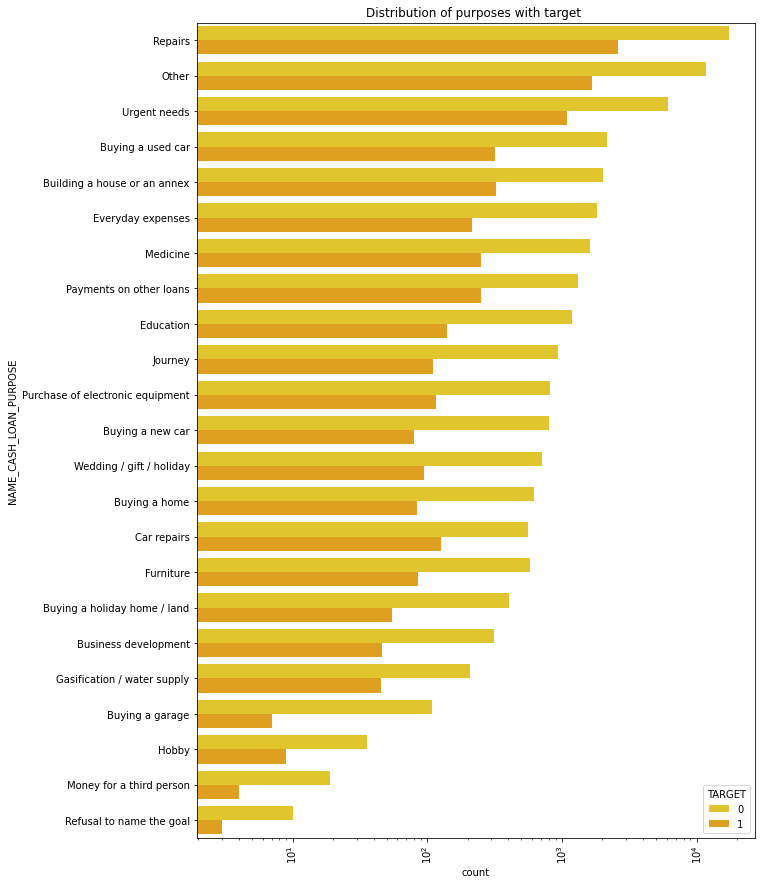

In [21]:
# Distribution of contract status

plt.figure(figsize=(10,15))
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of purposes with target ')
ax = sns.countplot(data = new_df1, y= 'NAME_CASH_LOAN_PURPOSE', order=new_df1['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',palette='Wistia')

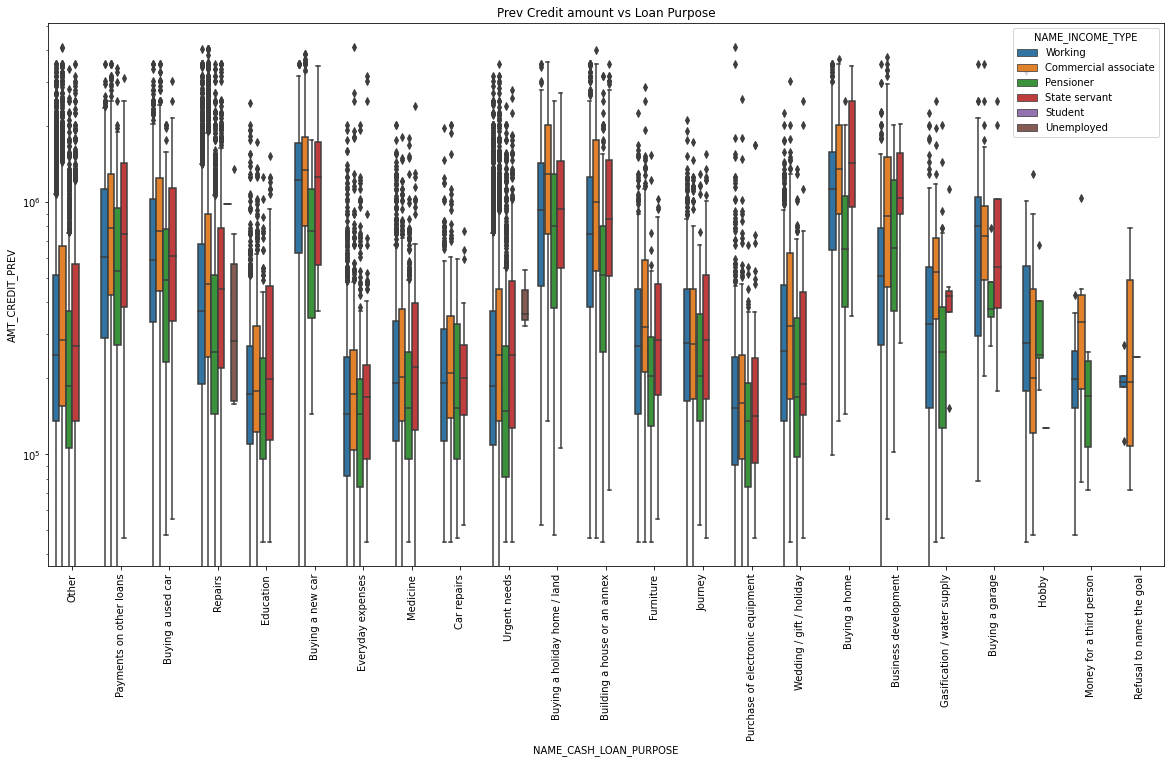

In [16]:
# Box plotting for Credit amount 

plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.yscale('log')
sns.boxplot(data =new_df1, x='NAME_CASH_LOAN_PURPOSE',hue='NAME_INCOME_TYPE',y='AMT_CREDIT_PREV',orient='v')
plt.title('Prev Credit amount vs Loan Purpose')
plt.show()

Conclusions from above plot:

The credit amount of Loan purposes like 'Buying a home','Buying a land','Buying a new car' and'Building a house' is higher.
Income type of state servants have a significant amount of credit applied
Money for third person or a Hobby is having less credits applied for.

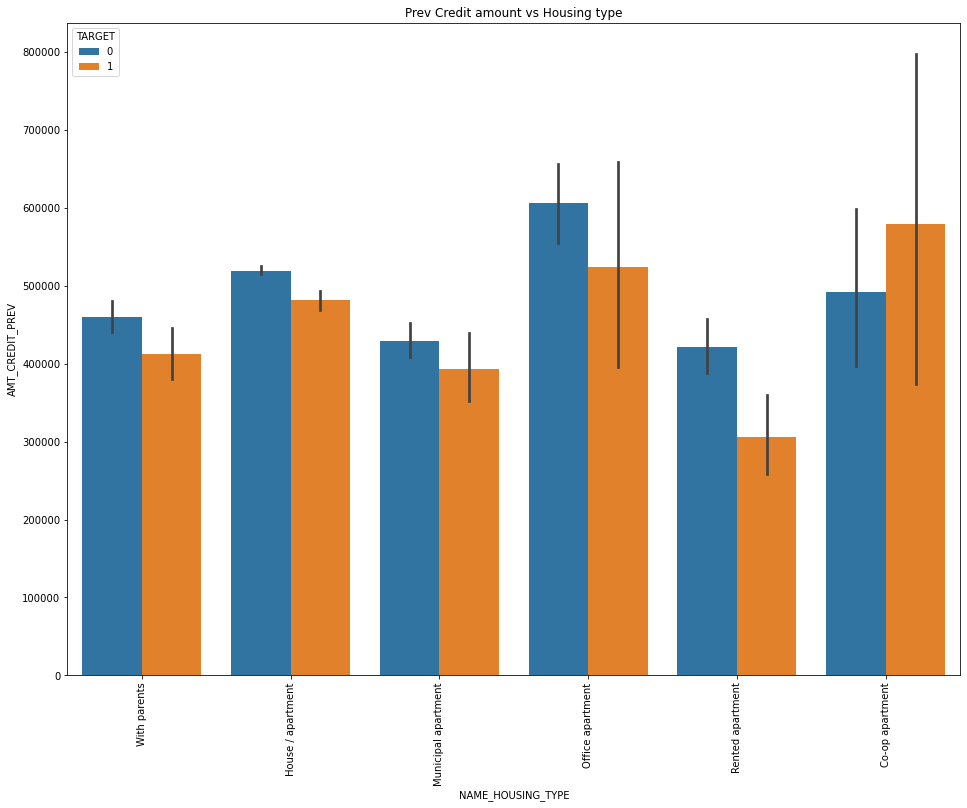

In [17]:
# Box plot for Credit amount prev vs Housing type

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
sns.barplot(data =new_df1, y='AMT_CREDIT_PREV',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Prev Credit amount vs Housing type')
plt.show()


Conclusion from above plot:
-office appartment is having higher credit of target 0 and co-op apartment is having higher credit of target 1. So, bank should avoid giving loans to the housing type of co-op apartment as they are having difficulties in repaying loans. 
Bank should target mostly on housing type with parents or House\appartment or miuncipal appartment for successful loan repayments.
